In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
import missingno as mno
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
# 1. Load the cars dataset.
df = pd.df = pd.read_csv('/Users/mohammadjuneidk/Desktop/DataScience/Assignments/lr_1st_assignment/autos.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                10000 non-null  int64 
 1   name                 10000 non-null  object
 2   yearOfRegistration   10000 non-null  int64 
 3   monthOfRegistration  10000 non-null  int64 
 4   gearbox              9423 non-null   object
 5   powerPS              10000 non-null  int64 
 6   model                9433 non-null   object
 7   kilometer            10000 non-null  int64 
 8   fuelType             9057 non-null   object
 9   brand                10000 non-null  object
 10  vehicleType          8950 non-null   object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [4]:
df.head(2)

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio


In [5]:
df.dtypes

price                   int64
name                   object
yearOfRegistration      int64
monthOfRegistration     int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
fuelType               object
brand                  object
vehicleType            object
dtype: object

# 3. Complete any other preprocessing required.

In [6]:
#copying the data by passing index values
df1=df.iloc[:,:]

In [7]:
df1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,NaN,101,astra,150000,NaN,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [8]:
# checking nan
df1.isna().sum()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

<AxesSubplot:>

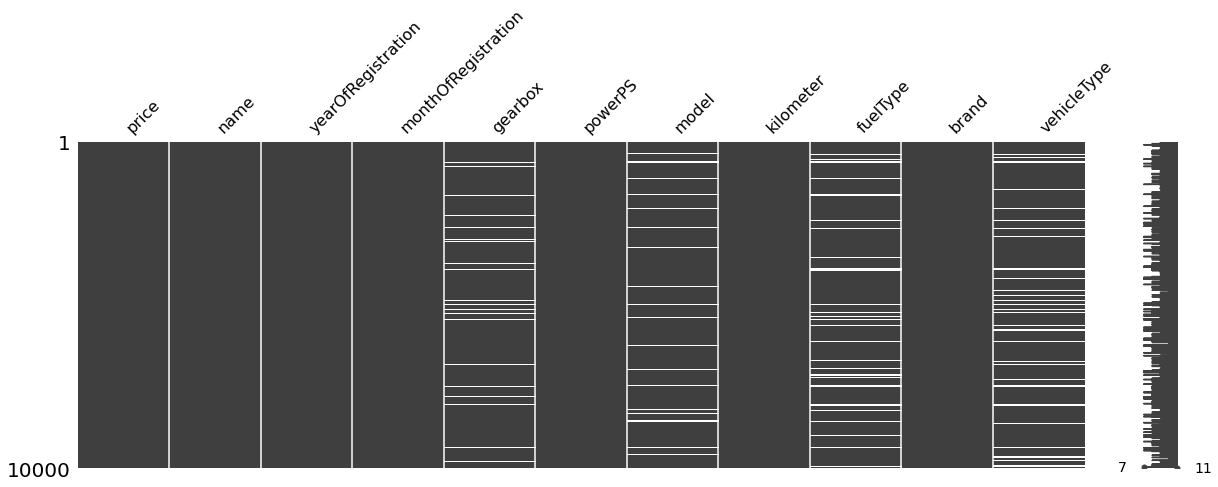

In [9]:
# visualising the missing data 
mno.matrix(df1, figsize = (20, 6))

In [10]:
# filling the nan values by mode
df1['vehicleType'] = df1['vehicleType'].fillna(df1.groupby('brand')['vehicleType'].transform(lambda x: x.fillna(x.mode()[0])))
df1['gearbox'] = df1['gearbox'].fillna(df1.groupby('brand')['gearbox'].transform(lambda x: x.fillna(x.mode()[0])))
#df1['model'] = df1['model'].fillna(df1.groupby('brand')['model'].transform(lambda x: x.fillna(x.mode()[0]))) 
df1['fuelType'] = df1['fuelType'].fillna(df1.groupby('brand')['fuelType'].transform(lambda x: x.fillna(x.mode()[0])))

In [11]:
# when we are groupping the data for model and calculating mode its getting empty so we are fiiling that manually by 2nd highest
df['model'] = df['model'].fillna('andere')

In [12]:
# now again verifying there are nan values are present in the dataset or not 

df.isna().sum()

price                  0
name                   0
yearOfRegistration     0
monthOfRegistration    0
gearbox                0
powerPS                0
model                  0
kilometer              0
fuelType               0
brand                  0
vehicleType            0
dtype: int64

In [13]:
#df1 = df1.replace(0,np.nan)

In [14]:
df1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,manuell,101,astra,150000,benzin,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [15]:
#df1.isna().sum()

In [16]:
df1.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000
mean,7.056705e+03,2003.637400,5.737600,122.01890,125034.000000
std,1.237501e+05,40.424633,3.706794,342.09721,40581.689607
min,0.000000e+00,1000.000000,0.000000,0.00000,5000.000000
25%,1.150000e+03,1999.000000,3.000000,69.00000,100000.000000
50%,2.999000e+03,2004.000000,6.000000,105.00000,150000.000000
75%,7.250000e+03,2008.000000,9.000000,150.00000,150000.000000
max,1.234568e+07,5000.000000,12.000000,17322.00000,150000.000000


# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

In [17]:
fig = px.box(df1, y=["price"],notched=False,color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(autosize=False,
                  width=1200,
                  height=800,
                  template = "presentation")
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
fig.show()

# tried figuring out outliers by using zscore but it seems for this dataset its not best strategy

In [18]:
priceupper = df1.price.mean() + 3*df1.price.std()
pricelower = df1.price.mean() -3*df1.price.std()
powerupper = df1.powerPS.mean() + 3*df1.price.std()
powerlower = df1.powerPS.mean() -3*df1.price.std()
yeareupper = df1.yearOfRegistration.mean() + 3*df1.price.std()
yearlower = df1.yearOfRegistration.mean() -3*df1.price.std()

price = df1[(df1.price<priceupper) & (df1.price>pricelower)]
power = df1[(df1.powerPS<priceupper) & (df1.powerPS>pricelower)]
year =  df1[(df1.yearOfRegistration<priceupper) & (df1.yearOfRegistration>pricelower)]

print(price.shape)
print(power.shape)
print(year.shape)

(9999, 11)
(10000, 11)
(10000, 11)


# removing outliers by using IQR

In [19]:
# creating the fucntion to remove outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [20]:
lowerbound,upperbound = outlier_treatment(df1.price)
#df1[(df1.price < lowerbound) | (df1.price > upperbound)]
df1.drop(df1[ (df1.price > upperbound) | (df1.price < lowerbound) ].index , inplace=True)

## repeating the same process for all other remaining columns

In [21]:
lowerbound,upperbound = outlier_treatment(df1.powerPS)
#df1[(df1.price < lowerbound) | (df1.price > upperbound)]
df1.drop(df1[ (df1.powerPS > upperbound) | (df1.powerPS < lowerbound) ].index , inplace=True)
df1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,manuell,101,astra,150000,benzin,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [22]:
lowerbound,upperbound = outlier_treatment(df1.kilometer)
#df1[(df1.price < lowerbound) | (df1.price > upperbound)]
df1.drop(df1[ (df1.kilometer > upperbound) | (df1.kilometer < lowerbound) ].index , inplace=True)
df1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine
...,...,...,...,...,...,...,...,...,...,...,...
9994,5200,Volkswagen_Golf_Plus_1.9_TDI,2005,12,manuell,90,golf,150000,diesel,volkswagen,bus
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,manuell,101,astra,150000,benzin,opel,kombi


In [23]:
fig = px.box(df1, y=["price"],notched=False,color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(autosize=False,
                  width=1200,
                  height=800,
                  template = "presentation")
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
fig.show()

In [24]:
df1.corr()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
price,1.000000,0.340313,0.119922,0.496321,-0.240004
yearOfRegistration,0.340313,1.000000,0.025739,0.108533,-0.122599
monthOfRegistration,0.119922,0.025739,1.000000,0.143797,-0.024112
powerPS,0.496321,0.108533,0.143797,1.000000,0.052953
kilometer,-0.240004,-0.122599,-0.024112,0.052953,1.000000


In [25]:
df1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine
...,...,...,...,...,...,...,...,...,...,...,...
9994,5200,Volkswagen_Golf_Plus_1.9_TDI,2005,12,manuell,90,golf,150000,diesel,volkswagen,bus
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,manuell,101,astra,150000,benzin,opel,kombi


In [26]:
fig = px.box(df1, y=["powerPS"],notched=False,color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(autosize=False,
                  width=1200,
                  height=800,
                  template = "presentation")
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
fig.show()

In [27]:
# 4. Apply various regression models and find out which model is the best for this dataset

In [28]:
# getting dummies for catogerical data
final = pd.get_dummies(df1, columns = ['gearbox','vehicleType','yearOfRegistration'])

In [29]:
final

,price,name,monthOfRegistration,powerPS,model,kilometer,fuelType,brand,gearbox_automatik,gearbox_manuell,...,yearOfRegistration_2010,yearOfRegistration_2011,yearOfRegistration_2012,yearOfRegistration_2013,yearOfRegistration_2014,yearOfRegistration_2015,yearOfRegistration_2016,yearOfRegistration_2017,yearOfRegistration_2018,yearOfRegistration_2019
1,3500,Bmw_320_cabrio,0,150,3er,125000,benzin,bmw,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,0,150,c_klasse,150000,benzin,mercedes_benz,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4000,A3_Limousine,7,0,a3,150000,diesel,audi,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2600,Smart_Smart_cabrio_450_cdi,7,41,fortwo,150000,diesel,smart,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2222,BMW_318ti_compact,10,143,3er,150000,benzin,bmw,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,5200,Volkswagen_Golf_Plus_1.9_TDI,12,90,golf,150000,diesel,volkswagen,0,1,...,0,0,0,0,0,0,0,0,0,0
9995,2650,Opel_Corsa_C_1.2_Twinport,1,80,corsa,150000,benzin,opel,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,6,140,touran,150000,diesel,volkswagen,0,1,...,0,1,0,0,0,0,0,0,0,0
9997,1500,Suche_zuverlaessigen_Kombi,0,101,astra,150000,benzin,opel,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# assinging the  data to variables 
X = df1.iloc[:,2:3].values
y = df1.iloc[:,0:1].values

In [31]:
X

array([[1996],
       [1998],
       [2006],
       ...,
       [2011],
       [1999],
       [2002]])

In [32]:
y

array([[3500],
       [2200],
       [4000],
       ...,
       [9600],
       [1500],
       [ 970]])

In [33]:
# splitting the dataset
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 0 )

In [34]:
# fitting the model 
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [35]:
# performance metrics

rmse = sqrt (mean_squared_error(y_test, y_pred))


r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1/(len(y)-len(lr.coef_)-1))*(1- r2)

rmse ,r2,adj_r2, lr.coef_,lr.intercept_

(3416.8453256419416,
 0.10564237722971237,
 -6897.18022844258,
 array([[171.34392238]]),
 array([-339673.84911924]))

In [40]:
l =  lr.intercept_

array([-339673.84911924])

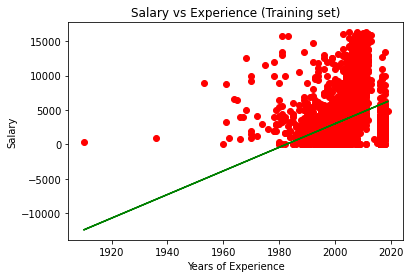

In [44]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

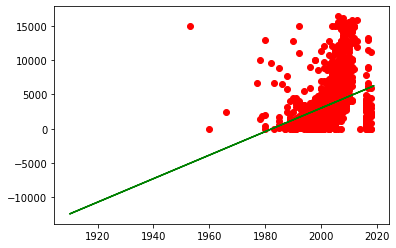

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
#plt.title("Salary vs Experience (Testing set)")
#plt.xlabel("Years of Experience")
#plt.ylabel("Salary")
plt.show()

## Applying multiple linear regression model


In [36]:
df1.head(4)

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [37]:
# getting dummies for catogerical data
final = pd.get_dummies(df1, columns = ['brand','fuelType','gearbox','vehicleType','yearOfRegistration','powerPS','model','kilometer'])
final

,price,name,monthOfRegistration,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,...,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,kilometer_90000,kilometer_100000,kilometer_125000,kilometer_150000
1,3500,Bmw_320_cabrio,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4000,A3_Limousine,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2600,Smart_Smart_cabrio_450_cdi,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2222,BMW_318ti_compact,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,5200,Volkswagen_Golf_Plus_1.9_TDI,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9995,2650,Opel_Corsa_C_1.2_Twinport,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,1500,Suche_zuverlaessigen_Kombi,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# assinging the  data to variables 
X = final.iloc[:,5:].values
y = final.iloc[:,0:1].values

In [39]:
X

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [51]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 0 )
# fitting the model 
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

rmse = sqrt (mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1/(len(y)-len(mlr.coef_)-1))*(1- r2)

rmse ,r2,adj_r2, #mlr.coef_,mlr.intercept_

(1.537333163394619e-11, 1.0, 1.0)

In [52]:
df1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine
...,...,...,...,...,...,...,...,...,...,...,...
9994,5200,Volkswagen_Golf_Plus_1.9_TDI,2005,12,manuell,90,golf,150000,diesel,volkswagen,bus
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,manuell,101,astra,150000,benzin,opel,kombi


In [53]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df1[['price','yearOfRegistration', 'powerPS', 'kilometer']]
vif_data = pd.DataFrame()
vif_data ["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns)) ]
print(vif_data)

              feature        VIF
0               price   2.949790
1  yearOfRegistration  85.730455
2             powerPS   5.975546
3           kilometer  83.565102


In [54]:
from yellowbrick.regressor import ResidualsPlot